# Final Project —— Yanqing Li (Net ID: yl6471)

## Middle Eastern Video on Demand

## PART I. Data Preprocess and Merge

In [1]:
import matplotlib.pyplot as plt
import scipy.stats as scs
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
subscriber=pd.read_pickle('subscribers')
subscriber.head(10)

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,NaN,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,...,0.0,False,2020-03-16,False,0.0000,0.3303,ar,False,False,NaN
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,1.0,False,2019-12-22,False,0.0000,0.1101,ar,False,False,NaN
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,...,0.0,False,2020-02-11,False,0.0000,0.0367,ar,False,False,NaN
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,9.0,False,2019-10-20,False,0.0000,0.0367,ar,False,False,NaN
284782,24810928,base,NaN,comedy,access to exclusive content,20.051667,NaN,False,70.0,False,...,71.0,True,2020-03-18,False,0.0000,0.3303,ar,True,True,RAKBANK
192823,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,61.0,False,...,NaN,True,2020-03-05,False,4.5875,0.3303,ar,True,False,Standard Charter
315863,20299962,base,3.002048,drama,access to exclusive content,34.551230,1.870503,False,23.0,False,...,NaN,True,2020-03-20,False,3.4498,0.0000,ar,True,False,RAKBANK
254782,24930568,base,NaN,comedy,access to exclusive content,25.851492,NaN,False,73.0,False,...,1.0,False,2020-03-09,False,0.0000,0.6606,ar,False,False,NaN
681969,23452753,economy,2.850348,drama,replace OTT,28.751405,1.888272,False,71.0,False,...,4.0,False,2020-02-05,False,0.0000,0.3303,ar,False,False,NaN


In [2]:
subscriber.shape

(227628, 29)

In [3]:
subscriber.columns

Index(['subid', 'package_type', 'num_weekly_services_utilized',
       'preferred_genre', 'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'retarget_TF', 'age', 'male_TF',
       'country', 'attribution_technical', 'attribution_survey', 'op_sys',
       'months_per_bill_period', 'plan_type', 'monthly_price',
       'discount_price', 'account_creation_date', 'creation_until_cancel_days',
       'cancel_before_trial_end', 'trial_end_date',
       'initial_credit_card_declined', 'revenue_net', 'join_fee', 'language',
       'paid_TF', 'refund_after_trial_TF', 'payment_type'],
      dtype='object')

In [4]:
subscriber[ 'weekly_consumption_hour'].unique()

array([         nan,  22.95157947,  36.0011861 ,  20.05166689,
        34.5512298 ,  25.85149206,  28.75140464,  37.45114239,
        33.10127351,  30.20136093,  27.30144835,  21.50162318,
        24.40153577,  31.65131722,  38.90109868,  14.25184173,
        18.6017106 ,  41.80101126,  47.60083643,  40.35105497,
        17.15175431,  43.25096755,  44.70092384,  50.50074901,
         4.10214769,  15.70179802,  46.15088014,  11.35192914,
         9.90197285,  66.45026821,   7.00206027,  12.80188543,
        59.20048676,   2.6521914 ,  49.05079272,  62.10039934,
        -8.94745894,  54.85061788,   8.45201656,  65.00031192,
        72.25009338,  27.83365486,  -4.59759006,  51.9507053 ,
        57.75053047,  63.55035563,   5.55210398,  -0.24772119,
        53.40066159, -11.84737152, -10.39741523,  -7.49750264,
        26.04533445,  75.15000596,  22.32194881,  60.65044305,
        67.90022451,  21.03413515,  76.59996225,  56.30057418,
       -13.29732781,  26.12287802,  21.75657111,  24.25

In [6]:
subscriber.isnull().sum()

subid                                0
package_type                     35574
num_weekly_services_utilized    110450
preferred_genre                  36326
intended_use                      3549
weekly_consumption_hour          37930
num_ideal_streaming_services    112170
retarget_TF                          0
age                              35169
male_TF                            269
country                              0
attribution_technical                0
attribution_survey                2644
op_sys                           13375
months_per_bill_period               0
plan_type                            0
monthly_price                        0
discount_price                       0
account_creation_date                0
creation_until_cancel_days       75860
cancel_before_trial_end              0
trial_end_date                       0
initial_credit_card_declined         0
revenue_net                      34904
join_fee                         34904
language                 

In [7]:
engagement = pd.read_pickle(r'engagement')

In [8]:
engagement.head()

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
1,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0
2,22349235,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0
3,22349235,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0
51,22680106,2019-07-02,2.0,1.0,7.0,7.0,0.0,1.0,0.0


In [9]:
customer_service = pd.read_pickle(r'customer_service_reps')

In [10]:
customer_service_sorted = customer_service.sort_values(by=['account_creation_date'])

In [11]:
customer_service_sorted

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
2248405,38647874,27845350,False,NaT,2019-06-30 00:00:04,14,True,OTT,3.5232,2,2019-09-11 11:07:12,NaT,NaN
2248404,38647874,27845350,False,NaT,2019-06-30 00:00:04,14,True,OTT,3.5232,1,2019-07-14 11:07:06,2019-09-11 11:07:12,NaN
2248403,38647874,27845350,False,NaT,2019-06-30 00:00:04,14,True,OTT,3.5232,0,2019-06-30 00:00:04,2019-07-14 11:07:06,NaN
2248401,33218156,21781165,True,NaT,2019-06-30 00:00:06,14,True,OTT,3.8902,1,2019-07-14 11:05:50,NaT,NaN
2248402,34478389,27625059,False,2019-07-01 10:27:01,2019-06-30 00:00:06,14,False,OTT,0.0000,0,2019-06-30 00:00:06,NaT,NaN
2248400,33218156,21781165,True,NaT,2019-06-30 00:00:06,14,True,OTT,3.8902,0,2019-06-30 00:00:06,2019-07-14 11:05:50,NaN
2248399,31803812,21965147,False,2019-07-04 15:37:24,2019-06-30 00:00:13,14,False,OTT,0.0000,0,2019-06-30 00:00:13,NaT,NaN
2248398,38960743,27633581,False,2019-07-06 13:25:38,2019-06-30 00:00:14,14,False,OTT,0.0000,0,2019-06-30 00:00:14,NaT,NaN
2248397,38865556,23575229,False,2019-06-30 00:51:54,2019-06-30 00:00:19,14,False,OTT,0.0000,0,2019-06-30 00:05:53,NaT,False
2248395,39561825,22320767,False,2019-11-27 09:30:04,2019-06-30 00:00:34,14,True,OTT,4.5875,0,2019-06-30 00:00:34,2019-07-14 10:43:57,True


In [12]:
customer_service_sorted = customer_service_sorted[['subid','current_sub_TF']]

In [13]:
churn_data = customer_service_sorted.drop_duplicates(keep = 'last')

In [14]:
churn_data 

,subid,current_sub_TF
2248403,27845350,False
2248402,27625059,False
2248400,21781165,True
2248399,21965147,False
2248398,27633581,False
2248397,23575229,False
2248396,22320767,False
2248394,26986758,False
2248393,28661481,False
2248392,22348406,False


In [15]:
merged_sub = subscriber.merge(churn_data, how = 'left',left_on='subid', right_on='subid')

In [16]:
merged_sub_churn = merged_sub[['current_sub_TF']]

left join customer service data onto subscriber data on key "subid". if a user does not have customer service information, we assume he/she will not churn by default.

In [17]:
merged_sub[['current_sub_TF']] = merged_sub_churn.fillna(True)

In [18]:
merged_sub

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type,current_sub_TF
0,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter,True
1,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,...,False,2020-03-16,False,0.0000,0.3303,ar,False,False,NaN,True
2,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,False,2019-12-22,False,0.0000,0.1101,ar,False,False,NaN,False
3,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,...,False,2020-02-11,False,0.0000,0.0367,ar,False,False,NaN,True
4,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,False,2019-10-20,False,0.0000,0.0367,ar,False,False,NaN,True
5,24810928,base,NaN,comedy,access to exclusive content,20.051667,NaN,False,70.0,False,...,True,2020-03-18,False,0.0000,0.3303,ar,True,True,RAKBANK,True
6,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,61.0,False,...,True,2020-03-05,False,4.5875,0.3303,ar,True,False,Standard Charter,True
7,20299962,base,3.002048,drama,access to exclusive content,34.551230,1.870503,False,23.0,False,...,True,2020-03-20,False,3.4498,0.0000,ar,True,False,RAKBANK,True
8,24930568,base,NaN,comedy,access to exclusive content,25.851492,NaN,False,73.0,False,...,False,2020-03-09,False,0.0000,0.6606,ar,False,False,NaN,False
9,23452753,economy,2.850348,drama,replace OTT,28.751405,1.888272,False,71.0,False,...,False,2020-02-05,False,0.0000,0.3303,ar,False,False,NaN,True


In [19]:
merged_sub[['num_weekly_services_utilized','weekly_consumption_hour','num_ideal_streaming_services','revenue_net','join_fee']] = merged_sub[['num_weekly_services_utilized','weekly_consumption_hour','num_ideal_streaming_services','revenue_net','join_fee']].fillna(0)

In [20]:
merged_sub[['package_type','preferred_genre','intended_use','male_TF','attribution_survey','payment_type']] = merged_sub[['package_type','preferred_genre','intended_use','male_TF','attribution_survey','payment_type']].fillna('Unknown')

In [21]:
merged_sub = merged_sub[merged_sub['age']<=120] 

In [22]:
merged_sub[['age']] = merged_sub[['age']].fillna(np.average(merged_sub['age'].dropna()))

/Users/yanqingli/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [23]:
merged_sub = merged_sub[merged_sub.columns.drop('op_sys')]

In [24]:
drop_list = ['creation_until_cancel_days','country', 'account_creation_date', 'trial_end_date', 'language'] 
for i in drop_list:
    merged_sub = merged_sub[merged_sub.columns.drop(i)]

In [25]:
merged_sub_base_uae_14_day_trial = merged_sub.loc[merged_sub['plan_type'] == 'base_uae_14_day_trial']
merged_sub_low_uae_no_trial = merged_sub.loc[merged_sub['plan_type'] == 'low_uae_no_trial']

In [26]:
merged_sub_base_uae_14_day_trial = merged_sub_base_uae_14_day_trial[['current_sub_TF','plan_type']]
merged_sub_low_uae_no_trial = merged_sub_low_uae_no_trial[['current_sub_TF','plan_type']]

In [27]:
merge_AB = pd.concat([merged_sub_base_uae_14_day_trial , merged_sub_low_uae_no_trial], axis=0)

In [28]:
merge_AB= pd.get_dummies(merge_AB, prefix=['plan_type'],drop_first= True)

In [29]:
merge_AB

,current_sub_TF,plan_type_low_uae_no_trial
1,True,0
2,False,0
3,True,0
4,True,0
5,True,0
6,True,0
7,True,0
8,False,0
9,True,0
10,True,0


## PART II. AB Test (Plan type: low uae no trial vs. base uae 14 day trial )

In [30]:
import imblearn
print(imblearn.__version__)
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
# make them same size group
X_under, y_under = undersample.fit_resample(merge_AB[['plan_type_low_uae_no_trial']],merge_AB[['current_sub_TF']])

0.6.2


In [31]:
merge_AB_under = pd.concat([X_under, y_under], axis=1)

In [32]:
merge_AB_under

,plan_type_low_uae_no_trial,current_sub_TF
0,0,False
1,0,False
2,0,False
3,0,False
4,0,False
5,0,False
6,0,False
7,0,False
8,0,False
9,0,False


In [33]:
import HW1 as ABTesting

In [34]:
groupA =  merge_AB_under.loc[merge_AB_under['plan_type_low_uae_no_trial'] == 0] #14 day trial
groupB =  merge_AB_under.loc[merge_AB_under['plan_type_low_uae_no_trial'] == 1] 

In [35]:
A_list = list(groupA['current_sub_TF'])
B_list = list(groupB['current_sub_TF'])

In [36]:
import scipy
norm = scipy.stats.norm()
ABTesting.t_test(A_list, B_list,0.95)

t score is:  9.602287616177218


9.602287616177218

B>A. It means that current subscribers with low uae no trail are more than ones with base uae 14 day trail. The difference is statistically significant. 

## PART III. Customer Segmentation

In [37]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import numpy
import seaborn as sns

In [38]:
engagement['date'] = pd.to_datetime(engagement['date'])
engagement

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
1,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0
2,22349235,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0
3,22349235,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0
51,22680106,2019-07-02,2.0,1.0,7.0,7.0,0.0,1.0,0.0
53,22680106,2019-07-03,1.0,0.0,0.0,6.0,0.0,1.0,0.0
55,20848497,2019-07-03,1.0,1.0,6.0,6.0,0.0,1.0,0.0
56,22680106,2019-07-04,1.0,0.0,0.0,5.0,0.0,1.0,0.0
58,20848497,2019-07-04,1.0,1.0,5.0,5.0,0.0,1.0,0.0
59,20848497,2019-07-05,1.0,0.0,5.0,5.0,0.0,1.0,0.0


In [41]:
feature_list = ['app_opens', 'cust_service_mssgs',
       'num_videos_completed', 'num_videos_more_than_30_seconds',
       'num_videos_rated', 'num_series_started']

In [42]:
customer_average = pd.pivot_table(engagement, values=feature_list, index='subid', aggfunc=np.mean)
customer_average.reset_index(drop=False, inplace=True)
customer_average

,subid,app_opens,cust_service_mssgs,num_series_started,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated
0,20000062,1.000000,0.750000,0.250000,1.500000,5.750000,0.000000
1,20000405,1.250000,1.000000,0.250000,3.250000,4.250000,0.000000
2,20000604,0.933333,0.333333,0.066667,0.533333,4.533333,0.000000
3,20000685,1.210526,0.263158,0.210526,0.368421,4.342105,0.000000
4,20000741,0.500000,0.500000,0.000000,1.000000,3.500000,0.000000
5,20000796,4.826087,0.826087,0.913043,4.217391,4.413043,0.065217
6,20000809,1.750000,0.500000,0.250000,0.500000,2.750000,0.000000
7,20000863,1.125000,0.625000,0.000000,0.750000,4.250000,0.000000
8,20000963,0.666667,0.250000,0.333333,2.666667,3.500000,0.000000
9,20000992,1.000000,0.500000,0.750000,2.750000,5.250000,0.000000


In [43]:
sub = pd.read_pickle(r'subscribers')

sub

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,NaN,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,...,0.0,False,2020-03-16,False,0.0000,0.3303,ar,False,False,NaN
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,1.0,False,2019-12-22,False,0.0000,0.1101,ar,False,False,NaN
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,...,0.0,False,2020-02-11,False,0.0000,0.0367,ar,False,False,NaN
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,9.0,False,2019-10-20,False,0.0000,0.0367,ar,False,False,NaN
284782,24810928,base,NaN,comedy,access to exclusive content,20.051667,NaN,False,70.0,False,...,71.0,True,2020-03-18,False,0.0000,0.3303,ar,True,True,RAKBANK
192823,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,61.0,False,...,NaN,True,2020-03-05,False,4.5875,0.3303,ar,True,False,Standard Charter
315863,20299962,base,3.002048,drama,access to exclusive content,34.551230,1.870503,False,23.0,False,...,NaN,True,2020-03-20,False,3.4498,0.0000,ar,True,False,RAKBANK
254782,24930568,base,NaN,comedy,access to exclusive content,25.851492,NaN,False,73.0,False,...,1.0,False,2020-03-09,False,0.0000,0.6606,ar,False,False,NaN
681969,23452753,economy,2.850348,drama,replace OTT,28.751405,1.888272,False,71.0,False,...,4.0,False,2020-02-05,False,0.0000,0.3303,ar,False,False,NaN


In [44]:
sub_dummy = sub[['package_type', 'preferred_genre', 'male_TF']]

sub_dummy = pd.get_dummies(sub_dummy)

sub_dummy

,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,male_TF_False,male_TF_True
162502,0,1,0,1,0,0,0,0,1,0
380374,1,0,0,1,0,0,0,0,1,0
496617,0,0,1,0,0,0,0,1,0,1
356799,1,0,0,0,1,0,0,0,1,0
681701,1,0,0,1,0,0,0,0,1,0
284782,1,0,0,1,0,0,0,0,1,0
192823,1,0,0,1,0,0,0,0,1,0
315863,1,0,0,0,1,0,0,0,1,0
254782,1,0,0,1,0,0,0,0,1,0
681969,0,1,0,0,1,0,0,0,1,0


In [45]:
sub_seg = pd.merge(sub[['subid']], sub_dummy, left_index=True, right_index = True, how='left')

sub_seg.shape

(227628, 11)

In [46]:
sub_seg = pd.merge(sub_seg, customer_average, on= 'subid', how='left')

sub_seg.shape

(227628, 17)

In [47]:
sub_seg.dropna(axis=0, inplace=True)

sub_seg.set_index('subid',inplace=True)
sub_seg.shape

(135019, 16)

In [48]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def fitting(df):
    Sum_of_squared_distances = []
    K = range(1,15)
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(df)
        Sum_of_squared_distances.append(km.inertia_)
    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()
    return 

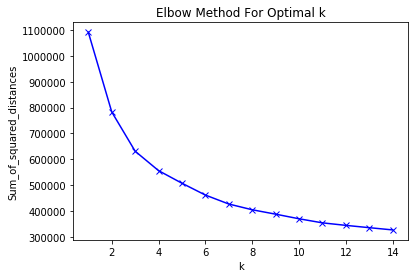

In [49]:
fitting(sub_seg)

In [50]:
kmeans = KMeans(n_clusters = 4, random_state=0).fit(sub_seg)

In [51]:
a = list(kmeans.cluster_centers_)

seg_result = pd.DataFrame(a, columns=sub_seg.columns)

seg_result

,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,male_TF_False,male_TF_True,app_opens,cust_service_mssgs,num_series_started,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated
0,0.475232,0.068402,0.249635,0.525498,0.184087,0.024618,0.018437,0.038805,0.915522,0.084478,1.605837,0.709777,0.666896,4.030700,5.108685,0.039979
1,0.472815,0.067157,0.278750,0.535894,0.198787,0.025843,0.015882,0.039954,0.881783,0.118217,1.405471,0.613001,0.339974,1.563997,4.945249,0.007619
2,0.414391,0.064194,0.281813,0.488620,0.190875,0.025916,0.014122,0.038692,0.868715,0.131285,0.984906,0.540867,0.117634,0.575325,2.793228,0.000798
3,0.556103,0.077688,0.269934,0.626811,0.191033,0.021015,0.021015,0.042258,0.912526,0.087474,5.402443,0.648483,0.803986,3.805809,4.862965,0.043561


## PART IV. Churn Model (Random Forest)

In [52]:
merged_sub = pd.get_dummies(merged_sub, prefix=['package_type', 'preferred_genre', 'intended_use','male_TF',  'attribution_technical', 'attribution_survey', 'plan_type',  'payment_type'], columns=['package_type', 'preferred_genre', 'intended_use','male_TF',  'attribution_technical', 'attribution_survey', 'plan_type',  'payment_type'])

In [53]:
merged_sub 

,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,months_per_bill_period,monthly_price,discount_price,cancel_before_trial_end,...,plan_type_low_gbp_14_day_trial,plan_type_low_sar_no_trial,plan_type_low_uae_no_trial,payment_type_Apple Pay,payment_type_CBD,payment_type_Najim,payment_type_Paypal,payment_type_RAKBANK,payment_type_Standard Charter,payment_type_Unknown
1,23383224,0.000000,22.951579,0.000000,False,70.0,4,4.7343,4.5141,False,...,0,0,0,0,0,0,0,0,0,1
2,26844789,3.362885,36.001186,1.951776,False,25.0,4,4.7343,4.5141,False,...,0,0,0,0,0,0,0,0,0,1
3,29417030,0.000000,20.051667,0.000000,False,30.0,4,4.7343,4.5141,False,...,0,0,0,0,0,0,0,0,0,1
4,26723159,3.731089,22.951579,2.506384,False,28.0,4,4.7343,4.5141,False,...,0,0,0,0,0,0,0,0,0,1
5,24810928,0.000000,20.051667,0.000000,False,70.0,4,4.7343,4.5141,True,...,0,0,0,0,0,0,0,1,0,0
6,29726122,2.049135,20.051667,1.860289,False,61.0,4,4.7343,4.5141,True,...,0,0,0,0,0,0,0,0,1,0
7,20299962,3.002048,34.551230,1.870503,False,23.0,4,4.7343,4.5141,True,...,0,0,0,0,0,0,0,1,0,0
8,24930568,0.000000,25.851492,0.000000,False,73.0,4,4.7343,4.5141,False,...,0,0,0,0,0,0,0,0,0,1
9,23452753,2.850348,28.751405,1.888272,False,71.0,4,4.7343,4.5141,False,...,0,0,0,0,0,0,0,0,0,1
10,21191741,0.000000,34.551230,0.000000,False,53.0,4,4.7343,4.5141,True,...,0,0,0,0,0,0,0,0,1,0


In [54]:
merged_sub.to_csv('churnmodel.csv',index=False)

In [55]:
from sklearn.model_selection import train_test_split
X = merged_sub[merged_sub.columns.drop('current_sub_TF')]
X = X[X.columns.drop('subid')]
y = merged_sub['current_sub_TF'].ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [56]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier()

In [57]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [58]:
y_pred = clf.predict(X_test)

In [59]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

0.6667641040631395
              precision    recall  f1-score   support

       False       0.64      0.72      0.68     23561
        True       0.69      0.62      0.65     24333

    accuracy                           0.67     47894
   macro avg       0.67      0.67      0.67     47894
weighted avg       0.67      0.67      0.67     47894



In [60]:

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
features = list()
for f in range(X.shape[1]):
    if importances[indices[f]] >= 0.01:
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
        features.append(list(X.columns)[indices[f]])
print('Most important features: ',features)



Feature ranking:
1. feature 4 (0.191464)
2. feature 1 (0.127722)
3. feature 0 (0.108658)
4. feature 2 (0.104629)
5. feature 10 (0.065823)
6. feature 11 (0.042729)
7. feature 8 (0.018718)
8. feature 12 (0.015876)
9. feature 102 (0.014346)
10. feature 14 (0.012861)
11. feature 15 (0.011030)
12. feature 25 (0.010908)
13. feature 18 (0.010715)
14. feature 72 (0.010667)
15. feature 19 (0.010389)
16. feature 30 (0.010267)
Most important features:  ['age', 'weekly_consumption_hour', 'num_weekly_services_utilized', 'num_ideal_streaming_services', 'revenue_net', 'join_fee', 'cancel_before_trial_end', 'paid_TF', 'payment_type_Unknown', 'package_type_Unknown', 'package_type_base', 'intended_use_access to exclusive content', 'preferred_genre_Unknown', 'attribution_survey_facebook', 'preferred_genre_comedy', 'intended_use_replace OTT']


## PART V. Expected CLV

In [61]:
clf.fit(X,y)

RandomForestClassifier()

In [62]:
y_pred = clf.predict(X)

In [63]:
y_pred = y_pred.astype(int)

In [64]:
revenue = np.array(X['revenue_net'])

In [65]:
revenue 

array([0.    , 0.    , 0.    , ..., 4.5875, 0.    , 0.    ])

In [66]:
expected_revenue = np.dot(y_pred,revenue)

In [67]:
expected_revenue

229978.971899999

In [68]:
clv = expected_revenue/len(y_pred)

In [69]:
clv

1.2004706896551671

In [70]:
X = merged_sub[merged_sub.columns.drop('current_sub_TF')]
y = merged_sub['current_sub_TF'].ravel()

In [71]:
df_pred= pd.concat([X, pd.DataFrame(y_pred,columns = ['current_sub'])], axis=1).dropna()

In [72]:
df_pred_not_churn = df_pred[df_pred['current_sub'] == 1]
df_pred_churn = df_pred[df_pred['current_sub'] == 0]

In [73]:
df_pred_churn

,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,months_per_bill_period,monthly_price,discount_price,cancel_before_trial_end,...,plan_type_low_sar_no_trial,plan_type_low_uae_no_trial,payment_type_Apple Pay,payment_type_CBD,payment_type_Najim,payment_type_Paypal,payment_type_RAKBANK,payment_type_Standard Charter,payment_type_Unknown,current_sub
1,23383224.0,0.000000,22.951579,0.000000,False,70.0,4.0,4.7343,4.5141,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,20299962.0,3.002048,34.551230,1.870503,False,23.0,4.0,4.7343,4.5141,True,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10,21191741.0,0.000000,34.551230,0.000000,False,53.0,4.0,4.7343,4.5141,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11,21361112.0,0.000000,37.451142,0.000000,False,24.0,4.0,4.7343,4.5141,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12,25393847.0,2.452687,28.751405,1.842940,False,57.0,4.0,4.7343,4.5141,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17,21829221.0,1.963711,27.301448,1.822501,False,24.0,4.0,4.7343,4.5141,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18,29090912.0,0.000000,37.451142,0.000000,False,50.0,4.0,4.7343,4.5141,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19,21760199.0,0.000000,30.201361,0.000000,False,32.0,4.0,4.7343,4.5141,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20,21511732.0,2.320133,27.301448,1.849591,True,26.0,4.0,4.7343,4.5141,True,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
21,22090440.0,3.701633,22.951579,2.330133,False,65.0,4.0,4.7343,4.5141,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [74]:
df_pred_churn.to_csv('predchurn.csv',index=False)

In [75]:
df_pred_not_churn

,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,months_per_bill_period,monthly_price,discount_price,cancel_before_trial_end,...,plan_type_low_sar_no_trial,plan_type_low_uae_no_trial,payment_type_Apple Pay,payment_type_CBD,payment_type_Najim,payment_type_Paypal,payment_type_RAKBANK,payment_type_Standard Charter,payment_type_Unknown,current_sub
2,26844789.0,3.362885,36.001186,1.951776,False,25.0,4.0,4.7343,4.5141,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,29417030.0,0.000000,20.051667,0.000000,False,30.0,4.0,4.7343,4.5141,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,26723159.0,3.731089,22.951579,2.506384,False,28.0,4.0,4.7343,4.5141,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5,24810928.0,0.000000,20.051667,0.000000,False,70.0,4.0,4.7343,4.5141,True,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6,29726122.0,2.049135,20.051667,1.860289,False,61.0,4.0,4.7343,4.5141,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8,24930568.0,0.000000,25.851492,0.000000,False,73.0,4.0,4.7343,4.5141,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
9,23452753.0,2.850348,28.751405,1.888272,False,71.0,4.0,4.7343,4.5141,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
13,23163827.0,2.876856,33.101274,1.867353,False,54.0,4.0,4.7343,4.5141,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,26308559.0,0.000000,30.201361,0.000000,False,48.0,4.0,4.7343,4.5141,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
16,27648682.0,0.000000,27.301448,0.000000,False,26.0,4.0,4.7343,4.5141,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [76]:
df_comp= pd.concat([pd.DataFrame(y,columns = ['current_sub']), pd.DataFrame(y_pred,columns = ['predicted_sub'])], axis=1).dropna()

In [77]:
df_comp= pd.concat([X[['subid']], df_comp], axis=1).dropna()

In [79]:
y_equal = list()
for i in range(len(y)):
    if y[i] == y_pred[i]:
        y_equal.append(1)
    else:
        y_equal.append(0)
df_comp= pd.concat([df_comp,pd.DataFrame(y_equal,columns = ['equal'])], axis=1).dropna()

In [80]:
df_comp.to_csv('predComp.csv',index=False)